In [1]:
#importin some useful packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#reading my data
train = pd.read_csv('gdrive/MyDrive/digit_images/digit-recognizer/train.csv')
test = pd.read_csv('gdrive/MyDrive/digit_images/digit-recognizer/test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# dividing between the labels (first column) and the remaining 784 values that represent the image as a 28*28
label = train.iloc[:,0]
x_train_GB = train.iloc[:,1:]

# reshaping the 1,784 to a 28, 28, 1 
x_train = x_train_GB.values.reshape(-1,28,28,1) 
#-1 means that the number of objects (nrows in the previous x_train) is inferred. We re reshaping it to a 28 by 28
# image, with 1 channel
x_train = x_train / 255.0
x_train_GB = x_train_GB / 255.0

Text(0.5, 1.0, 'sample plot')

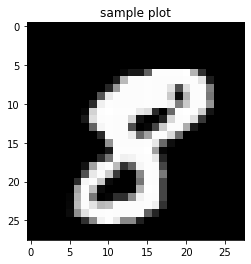

In [7]:
# plotting a sample image
plt.imshow(x_train[10][:,:,0], cmap = 'gray')
plt.title('sample plot')

# Applying some common models for classification.
 Remember that now we re talking about classification with multiple classes, so some algorithms have to be changed from their standard form (eg logistic regression)




In [8]:
# importin the statistical models that will be used for the task
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
# and splitting the dataset in train and test dataset
from sklearn.model_selection import train_test_split

X_train_GB, X_test_GB, label_train, label_test = train_test_split(x_train_GB, label, test_size=0.30, random_state=42)

In [ ]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnbcv = cross_val_score(lr, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

[0.55988095 0.55714286 0.55940476 0.55095238 0.55892857]
0.5572619047619047


In [ ]:
# here we have a problem with convergence, the logistic regression simply doesnt converge. I tried to increase the 
# number of iterations with no results (I need a stronger computer)

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 2000)
cv = cross_val_score(lrcv = cross_val_score(lr, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KeyboardInterrupt: ignored

In [ ]:
# Decision tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

[0.86154762 0.8547619  0.85678571 0.85464286 0.85452381]
0.856452380952381


In [ ]:
# K neighbors classifier
# due to the curse of dimensionality  KNC is not a good classifier. it takes too long
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

In [13]:
# Random forest (bagging approach = boosting + aggregation)
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

[0.96037415 0.95544218 0.96190476 0.95901361 0.96071429]
0.9594897959183675


In [ ]:
# Support vector classifier

#also this one is incredibly long, so I did not finish to run it
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

In [10]:
#this one takes quite a while (boosting approach). For this sake a stopped it
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_GB, label_train, cv = 5)
print(cv)
print(cv.mean())

KeyboardInterrupt: ignored

## Here we build the confusion matrix for the best performing algorithm

Confusion Matrix:
[[1184    0    1    1    1    1    6    0    5    1]
 [   0 1376    5    2    1    1    2    1    0    1]
 [   6    5 1235    7   12    1    5    9   14    0]
 [   4    2   18 1270    2   16    1   14   16   12]
 [   2    0    3    0 1179    0    8    1    2   27]
 [   2    1    3   16    1 1034   13    4    5    6]
 [   7    3    3    0    4    6 1227    0    6    0]
 [   1    7   13    1    9    0    0 1300    3   25]
 [   2    5    6    9    7    9    6    3 1150   12]
 [   6    3    4   20   15    7    2   11    6 1157]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1200
           1       0.98      0.99      0.99      1389
           2       0.96      0.95      0.96      1294
           3       0.96      0.94      0.95      1355
           4       0.96      0.96      0.96      1222
           5       0.96      0.95      0.96      1085
           6       0.97      0.98      0.97      

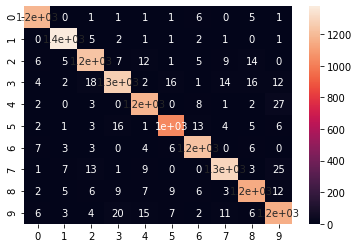

In [18]:
# importin the package for the confusion matrix, and building it
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns # for the heatmpat on the classification

rf.fit(X_train_GB, label_train) #fitting the model 
y_test_predicted = rf.predict(X_test_GB) # predicting on the test dataset

result = confusion_matrix(label_test, y_test_predicted)
print('Confusion Matrix:')
print(result)
result1 = classification_report(label_test, y_test_predicted)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(label_test, y_test_predicted)
print('Accuracy:',result2)

print('And here the heatmap on the confusion matrix')
sns.heatmap(result, annot=False)

# Convolutionary Neural Network

In [28]:
# I divide again in traninng and test, because here I need the 28*28 images not the 784 long vector. 
# with random state equal to 42 I insure that the division is the same as before
X_train, X_test, label_train, label_test = train_test_split(x_train, label, test_size=0.30, random_state=42)

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dropout

In [39]:
# here I start building the model
model = models.Sequential()

# I add the convolutionary layer, very useful for image analysis
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))# here the dimension of the images, 28*28*1
model.add(Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(Dropout(0.3))


#and here I add the dense layer for the classification task
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10)) # we have 10 categories

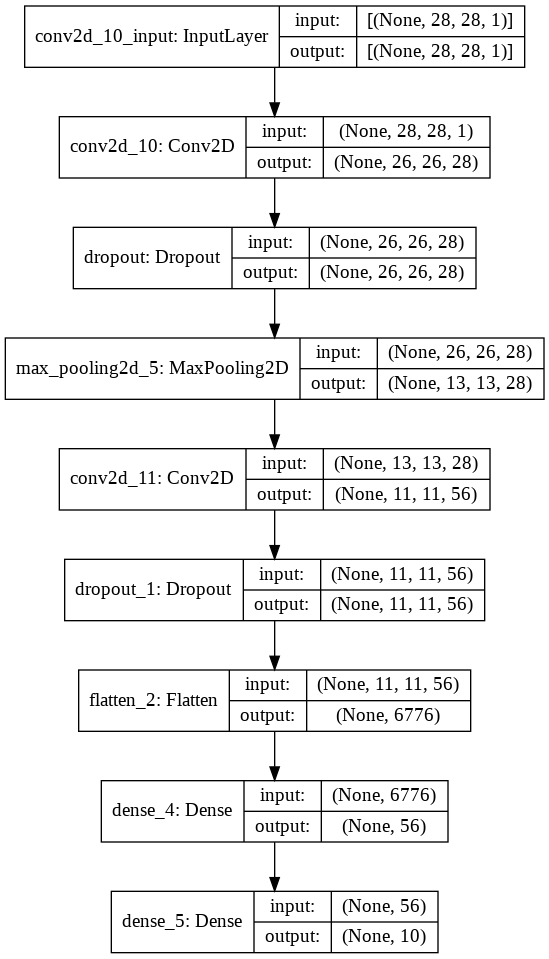

In [40]:
from keras.utils import plot_model
plot_model(model, to_file = '/tmp/model.png', show_shapes = True,)

In [41]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, label_train, validation_split = 0.20, epochs = 20, batch_size = 10, verbose = 1)

Epoch 1/20
2352/2352 [==============================] - 38s 16ms/step - loss: 0.3576 - accuracy: 0.8899 - val_loss: 0.0867 - val_accuracy: 0.9772
Epoch 2/20
2352/2352 [==============================] - 38s 16ms/step - loss: 0.0741 - accuracy: 0.9761 - val_loss: 0.0698 - val_accuracy: 0.9794
Epoch 3/20
2352/2352 [==============================] - 38s 16ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 4/20
2352/2352 [==============================] - 37s 16ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0617 - val_accuracy: 0.9816
Epoch 5/20
2352/2352 [==============================] - 37s 16ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0557 - val_accuracy: 0.9816
Epoch 6/20
2352/2352 [==============================] - 38s 16ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0609 - val_accuracy: 0.9816
Epoch 7/20
2352/2352 [==============================] - 37s 16ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0520 -

394/394 - 3s - loss: 0.0565 - accuracy: 0.9888


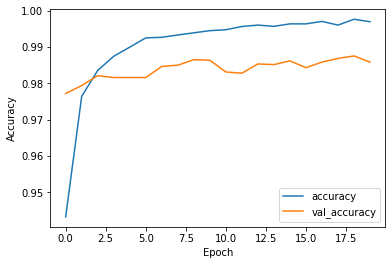

In [42]:
# amd plotting the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, label_test, verbose=2)

In [44]:
print('the accuracy of my CNN is: ',test_acc)

the accuracy of my CNN is:  0.9888095259666443
